In [1]:
import numpy as np
import pandas as pd
from customized import preprocess
from customized import metrics
from customized.model import rnns
from customized.model import temporal_context_models

# Product Model (ONE product in a basket)

In [2]:
prod = pd.read_pickle('data/prod.pkl')
txn = pd.read_pickle('data/txn.pkl')
end_date = '2021-11-01'
sub_txn = txn[txn.user_id.isin(['10891','12235','6112','6835','6897','4460','4793'])]
sub_txn.user_id.value_counts()
streamer_static_fname='streamer_static_features_7.csv'
rfm, static_df = preprocess.generate_static_user_context(sub_txn, end_date)

In [17]:
cp_one_model = temporal_context_models.CustomerOneProduct(sub_txn, end_date, static_df)
cp_one_loss_record, cp_one_epoch_loss = cp_one_model.train() # 736人, 67人, 13人

Sequence length:  5 Batch size:  32
付款單號不等於t筆: 0
(736, 3840) (736, 768)
(493, 3840) (243, 3840) (493, 768) (243, 768)
Start training...
Epoch [1/11], Step [16/16], Loss: 0.0221
Epoch [2/11], Step [16/16], Loss: 0.0175
Epoch [3/11], Step [16/16], Loss: 0.0179
Epoch [4/11], Step [16/16], Loss: 0.0184
Epoch [5/11], Step [16/16], Loss: 0.0131
Epoch [6/11], Step [16/16], Loss: 0.0158
Epoch [7/11], Step [16/16], Loss: 0.0153
Epoch [8/11], Step [16/16], Loss: 0.0182
Epoch [9/11], Step [16/16], Loss: 0.0133
Epoch [10/11], Step [16/16], Loss: 0.0174
Epoch [11/11], Step [16/16], Loss: 0.0136
Step [8/8], Loss: 0.0140
Sequence length:  10 Batch size:  32
付款單號不等於t筆: 0
(67, 7680) (67, 768)
(44, 7680) (23, 7680) (44, 768) (23, 768)
Start training...
Epoch [1/11], Step [2/2], Loss: 0.1055
Epoch [2/11], Step [2/2], Loss: 0.0660
Epoch [3/11], Step [2/2], Loss: 0.0355
Epoch [4/11], Step [2/2], Loss: 0.0254
Epoch [5/11], Step [2/2], Loss: 0.0240
Epoch [6/11], Step [2/2], Loss: 0.0233
Epoch [7/11], Step [2

5 Sequences Training Loss : 0.0136
10 Sequences Training Loss : 0.0168
15 Sequences Training Loss : 0.0183


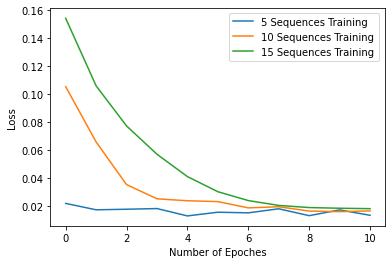

In [18]:
metrics.plot_loss_wo_val(cp_one_epoch_loss, x_max=11, model_name='tr_cp_one')

In [19]:
sequence_length = 10
basket_trues, basket_preds, basket_hn, cust_basket_preds, cust_id3, single_prod_n = cp_one_model.test(sequence_length, batch_size=32)

付款單號不等於t筆: 0
(67, 7680) (67, 768)
matching of # of customers incorrects:  0
Final loss: 0.017124444246292114
